# Graph  [source](https://www.geeksforgeeks.org/graph-and-its-representations/)


### Defination

A Graph is a non-linear data structure consisting of nodes and edges.  

- 1. A finite set of vertices also called as nodes.
- 2. A finite set of ordered pair of the form (u, v) called as edge. The pair is ordered because (u, v) is not same as (v, u) in case of a directed graph(di-graph). The pair of the form (u, v) indicates that there is an edge from vertex u to vertex v. The edges may contain weight/value/cost.

Graphs are used to represent many real-life applications: Graphs are used to represent networks. The networks may include paths in a city or telephone network or circuit network. Graphs are also used in social networks like linkedIn, Facebook. For example, in Facebook, each person is represented with a vertex(or node). Each node is a structure and contains information like person id, name, gender and locale.

![img](https://media.geeksforgeeks.org/wp-content/uploads/undirectedgraph.png)

### Representation [source](https://www.geeksforgeeks.org/graph-and-its-representations/)

Following two are the most commonly used representations of a graph.

- Adjacency Matrix
- Adjacency List

There are other representations also like, **Incidence Matrix** and **Incidence List**. The choice of the graph representation is situation specific. It totally depends on the type of operations to be performed and ease of use.

#### Adjacency Matrix:

Adjacency Matrix is a 2D array of size V x V where V is the number of vertices in a graph. 

       Let the 2D array be adj[][], a slot adj[i][j] = 1 indicates that there is an edge from vertex i to vertex j. Adjacency matrix for undirected graph is always symmetric. Adjacency Matrix is also used to represent weighted graphs. If adj[i][j] = w, then there is an edge from vertex i to vertex j with weight w.
            
            

![img](https://media.geeksforgeeks.org/wp-content/uploads/adjacencymatrix.png)

- Pros: Representation is easier to implement and follow. Removing an edge takes O(1) time. Queries like whether there is an edge from vertex ‘u’ to vertex ‘v’ are efficient and can be done O(1).

-  Cons: Consumes more space O(V^2). Even if the graph is sparse(contains less number of edges), it consumes the same space. Adding a vertex is O(V^2) time.
Please see this for a sample Python implementation of adjacency matrix.

#### Adjacency List:
An array of lists is used. Size of the array is equal to the number of vertices. Let the array be array[]. An entry array[i] represents the list of vertices adjacent to the ith vertex. This representation can also be used to represent a weighted graph. The weights of edges can be represented as lists of pairs. Following is adjacency list representation of the above graph. 

![img](https://media.geeksforgeeks.org/wp-content/uploads/listadjacency.png)

### Implementation

In [24]:
# A class to represent the adjacency list of the node 
class AdjNode: 
    def __init__(self, data): 
        self.vertex = data 
        self.next = None

A class to represent a graph. A graph 
is the list of the adjacency lists. 
Size of the array will be the no. of the 
vertices "V" 

In [27]:
class Graph: 
    def __init__(self, vertices): 
        self.V = vertices 
        self.graph = [None] * self.V 

        
        
    '''Function to add an edge in an undirected graph'''
    def add_edge(self, src, dest): 
        
        # Adding the node to the source node 
        node = AdjNode(dest) 
        node.next = self.graph[src] 
        self.graph[src] = node 

        # Adding the source node to the destination as 
        # it is the undirected graph 
        node = AdjNode(src) 
        node.next = self.graph[dest] 
        self.graph[dest] = node 

        
        
    '''Function to print the graph'''
    def print_graph(self): 
        for i in range(self.V): 
            print("Adjacency list of vertex {}\n head".format(i), end="") 
            temp = self.graph[i] 
            while temp: 
                print(" -> {}".format(temp.vertex), end="") 
                temp = temp.next
            print(" \n") 

In [28]:
V = 5
graph = Graph(V) 
graph.add_edge(0, 1) 
graph.add_edge(0, 4) 
graph.add_edge(1, 2) 
graph.add_edge(1, 3) 
graph.add_edge(1, 4) 
graph.add_edge(2, 3) 
graph.add_edge(3, 4) 

graph.print_graph() 

Adjacency list of vertex 0
 head -> 4 -> 1 

Adjacency list of vertex 1
 head -> 4 -> 3 -> 2 -> 0 

Adjacency list of vertex 2
 head -> 3 -> 1 

Adjacency list of vertex 3
 head -> 4 -> 2 -> 1 

Adjacency list of vertex 4
 head -> 3 -> 1 -> 0 



### Assignment

- Create a random Graph(Network over Kathmandu) with toatal nodes 200
- Find information of Graph
- Find neighbourhood of nodes: 4,67,128,135,158
- What are the degree of nodes: 4,67,128,135,158
- Perform a random walk (step, 10,50,75,100,200) in graph starting from node 1 and highlight the edges 

In [17]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

#### Pokhara

In [18]:
xc = 28.2096
yc = 83.9856
s = 0.1
dx = 0.001
dy = 0.001
X = np.arange(xc-s,xc+s,dx)
Y = np.arange(yc-s,yc+s,dy)
len(X),len(Y)

(201, 200)

In [19]:
import random as random

LAT = []
LONG = []
G = nx.Graph()
POS = {}
k = 0
for i in range(30):
    for j in range(30):
        x = random.choice(X)
        y = random.choice(Y)
        LAT.append(x)
        LONG.append(y)
        POS.update({k:[x,y]})
        k = k+1

In [32]:
G  = nx.random_geometric_graph(200, radius = 0.025 ,pos=POS, dim=2, p=2, seed=None)

In [33]:
pos = nx.get_node_attributes(G, 'pos')

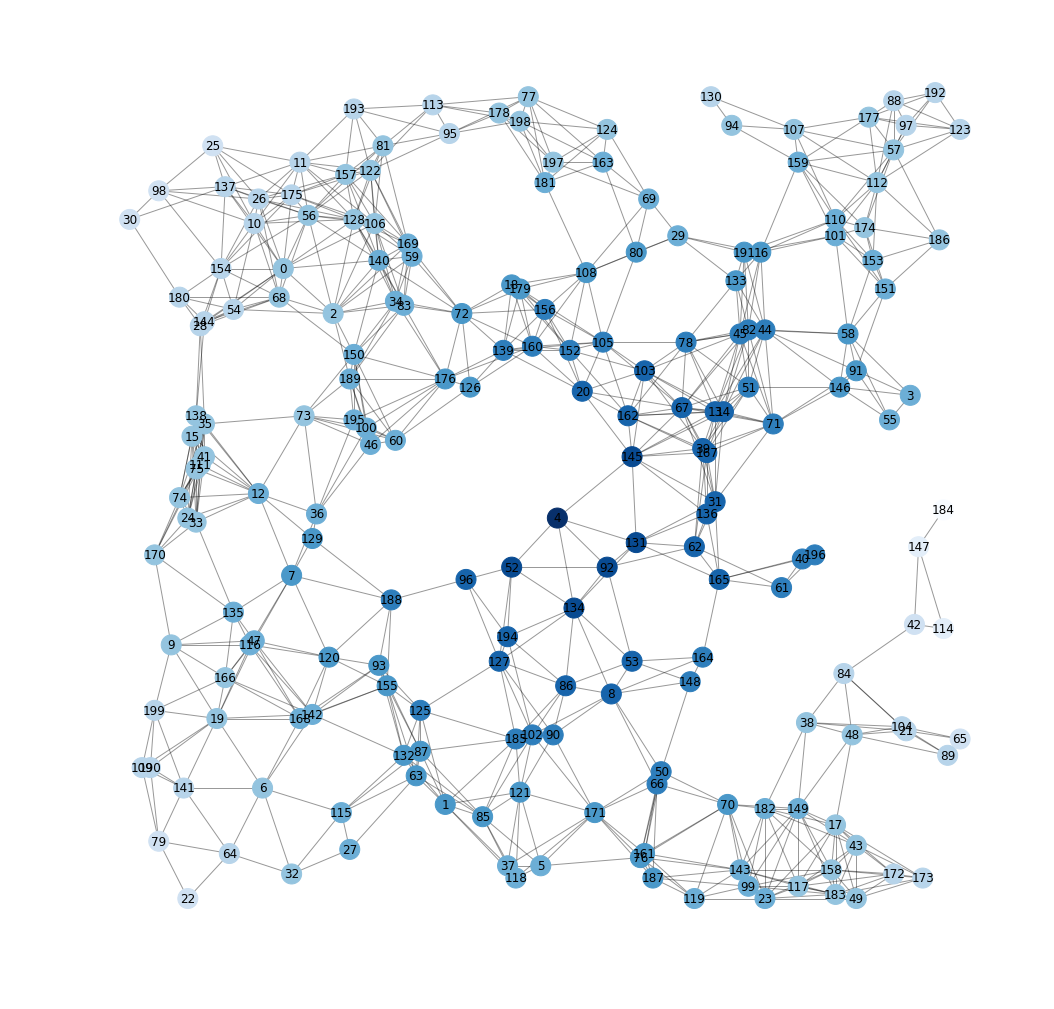

In [34]:
# find node near center (xc,yc)
dmin = 0.5
ncenter = 0

for n in pos:
    x, y = pos[n]
    d = (x - xc)**2 + (y - yc)**2
    if d < dmin:
        ncenter = n
        dmin = d

# color by path length from node near center
p = dict(nx.single_source_shortest_path_length(G, ncenter))


plt.figure(figsize=(18, 18))
pos = POS
nx.draw_networkx_edges(G, pos,\
                       nodelist=[ncenter],\
                       alpha=0.4)

nx.draw_networkx_nodes(G, pos,\
                       nodelist=list(p.keys()),
                       node_size=400,
                       node_color=list(p.values()),
                       cmap=plt.cm.Blues_r)

nx.draw_networkx_labels(G,pos,with_labels=True)

#plt.xlim(-0.05, 1.05)
#plt.ylim(-0.05, 1.05)
plt.axis('off')
plt.show()

In [37]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 200
Number of edges: 827
Average degree:   8.2700


In [38]:
nx.degree(G)

DegreeView({0: 14, 1: 9, 2: 13, 3: 4, 4: 5, 5: 6, 6: 7, 7: 8, 8: 9, 9: 7, 10: 12, 11: 12, 12: 13, 13: 14, 14: 14, 15: 9, 16: 9, 17: 11, 18: 7, 19: 11, 20: 9, 21: 6, 22: 2, 23: 11, 24: 9, 25: 6, 26: 12, 27: 3, 28: 8, 29: 6, 30: 3, 31: 11, 32: 4, 33: 10, 34: 11, 35: 11, 36: 7, 37: 6, 38: 6, 39: 12, 40: 3, 41: 9, 42: 3, 43: 9, 44: 13, 45: 12, 46: 8, 47: 9, 48: 7, 49: 8, 50: 7, 51: 11, 52: 6, 53: 6, 54: 8, 55: 4, 56: 15, 57: 11, 58: 9, 59: 9, 60: 8, 61: 4, 62: 8, 63: 8, 64: 5, 65: 3, 66: 7, 67: 15, 68: 11, 69: 6, 70: 10, 71: 12, 72: 12, 73: 9, 74: 10, 75: 10, 76: 9, 77: 8, 78: 11, 79: 5, 80: 5, 81: 10, 82: 12, 83: 11, 84: 5, 85: 10, 86: 8, 87: 9, 88: 6, 89: 4, 90: 7, 91: 7, 92: 6, 93: 8, 94: 3, 95: 7, 96: 4, 97: 6, 98: 6, 99: 10, 100: 8, 101: 9, 102: 9, 103: 11, 104: 6, 105: 12, 106: 14, 107: 7, 108: 10, 109: 5, 110: 10, 111: 10, 112: 12, 113: 7, 114: 2, 115: 6, 116: 9, 117: 11, 118: 6, 119: 7, 120: 8, 121: 9, 122: 13, 123: 6, 124: 6, 125: 8, 126: 5, 127: 9, 128: 16, 129: 4, 130: 2, 131: 8

In [39]:
for node in G.nodes():
    print(node,"|",[n for n in G.neighbors(node)])

0 | [175, 128, 28, 144, 2, 56, 106, 54, 68, 140, 10, 154, 26, 137]
1 | [37, 121, 132, 87, 63, 185, 125, 118, 85]
2 | [56, 128, 140, 54, 0, 34, 59, 189, 169, 83, 68, 106, 150]
3 | [55, 146, 91, 58]
4 | [131, 134, 52, 145, 92]
5 | [171, 37, 118, 85, 76, 121]
6 | [32, 142, 115, 64, 168, 19, 141]
7 | [120, 116, 12, 135, 47, 188, 129, 36]
8 | [148, 102, 53, 66, 134, 86, 50, 164, 90]
9 | [19, 170, 116, 47, 199, 135, 166]
10 | [128, 26, 175, 137, 98, 154, 54, 68, 56, 0, 25, 11]
11 | [26, 175, 25, 56, 137, 122, 157, 128, 106, 81, 193, 10]
12 | [138, 111, 129, 41, 74, 15, 7, 33, 73, 36, 24, 35, 75]
13 | [162, 51, 82, 44, 167, 78, 71, 14, 45, 31, 67, 103, 145, 39]
14 | [31, 162, 71, 78, 145, 13, 45, 82, 51, 39, 103, 167, 44, 67]
15 | [74, 24, 33, 75, 35, 12, 111, 138, 41]
16 | [159, 29, 44, 110, 101, 191, 133, 45, 82]
17 | [158, 117, 43, 182, 149, 48, 23, 173, 183, 49, 172]
18 | [72, 152, 108, 160, 179, 139, 156]
19 | [9, 190, 199, 109, 166, 168, 142, 116, 47, 6, 141]
20 | [162, 145, 152, 105, 6